In [ ]:
import numpy as np
import pandas as pd

In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum()

0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, f1_score


In [ ]:
le = LabelEncoder()
crop['label'] = le.fit_transform(crop['label'])

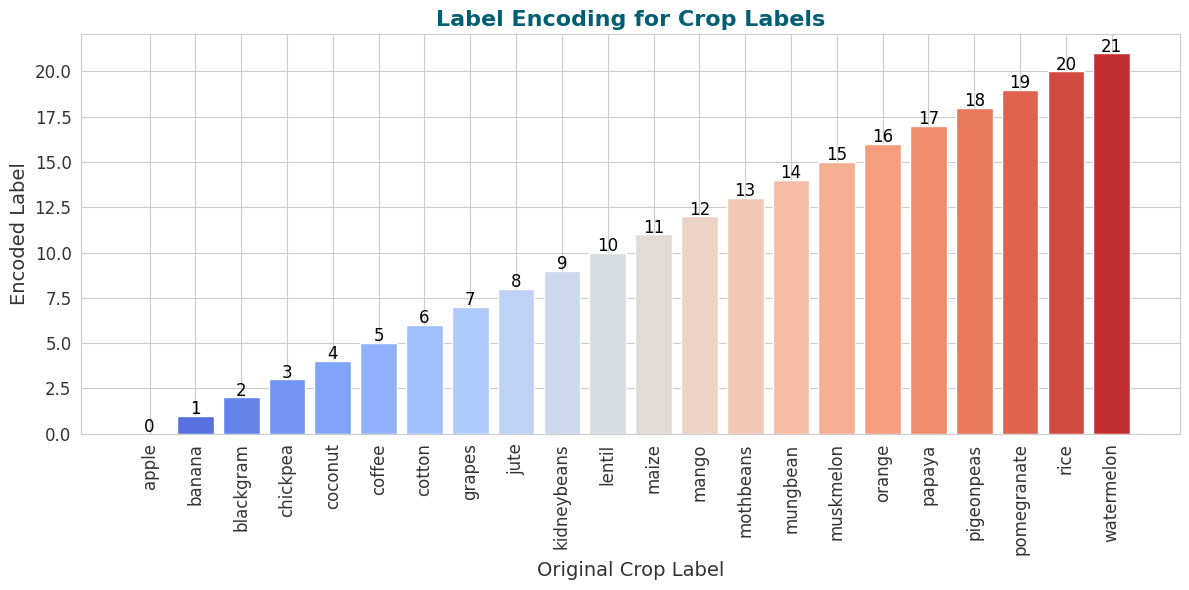

In [ ]:

# Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the original labels and their corresponding encoded values
label_mapping = pd.DataFrame({'Original Label': le.classes_, 'Encoded Label': le.transform(le.classes_)})

# Set figure size
plt.figure(figsize=(12, 6))

# Set a clean background style with gridlines for a clearer look
sns.set_style("whitegrid")

# Use a gradient color palette to make it visually appealing
colors = sns.color_palette("coolwarm", len(label_mapping))

# Plot the bar chart
bars = plt.bar(label_mapping['Original Label'], label_mapping['Encoded Label'], color=colors)

# Add labels and title with customized font size and color
plt.xlabel('Original Crop Label', fontsize=14, color='#333333')
plt.ylabel('Encoded Label', fontsize=14, color='#333333')
plt.title('Label Encoding for Crop Labels', fontsize=16, fontweight='semibold', color='#005f73')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Annotate each bar with its height (the encoded label) for clarity
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.1,
             f'{int(bar.get_height())}', ha='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


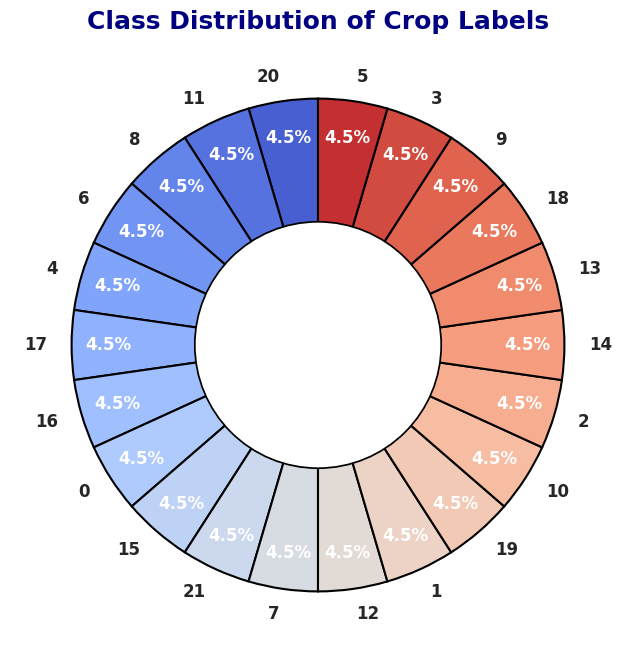

In [ ]:
# Calculate the distribution of crop labels
label_counts = crop['label'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 8))

# Create the pie chart with a hole in the middle (donut chart)
colors = sns.color_palette("coolwarm", len(label_counts))  # Coolwarm palette for contrast
wedges, texts, autotexts = plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
                                   startangle=90, colors=colors, pctdistance=0.85,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})

# Add a circle in the middle to create the donut hole (with a smaller radius now)
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor='black', linewidth=1.25)  # Radius reduced from 0.70 to 0.60
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.gca().set_aspect('equal')

# Styling the text elements (labels and percentages)
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Removed the line causing the error:
# plt.pie(label_counts, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid', 'shadow': True})
# The shadow property is not supported by the Wedge object.

# Add a title with enhanced font settings
plt.title('Class Distribution of Crop Labels', fontsize=18, fontweight='bold', color='navy')

# Show the chart
plt.show()

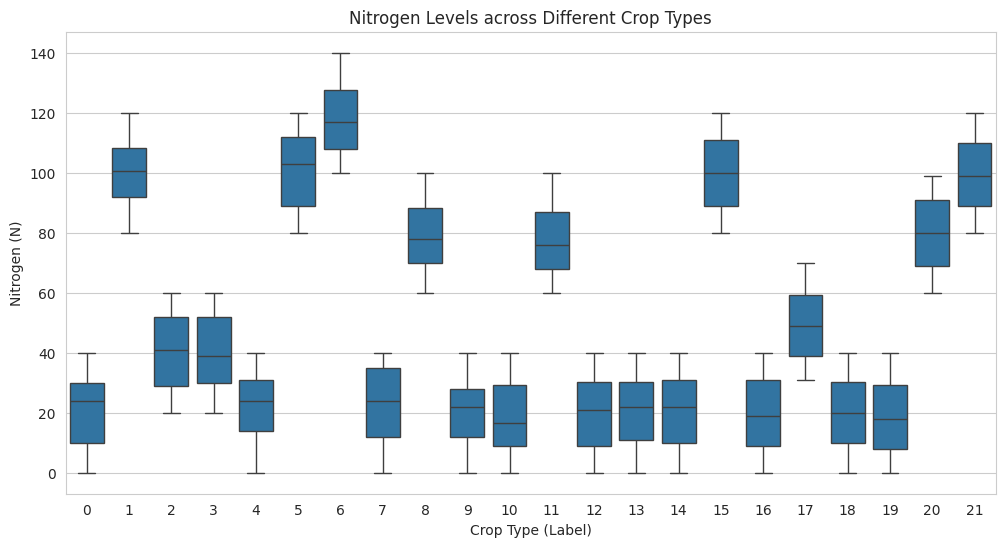

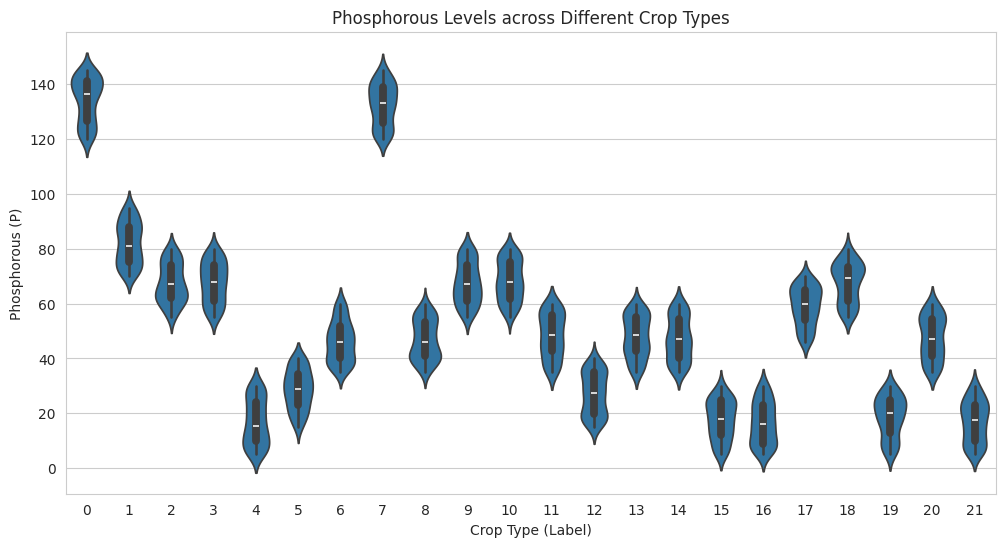

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


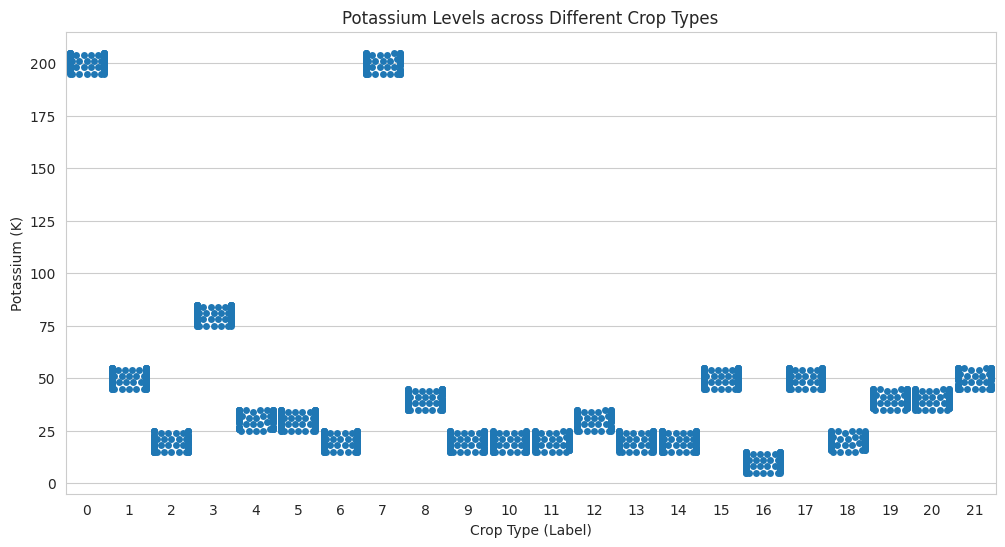

In [ ]:
# prompt: visualize relation between any features and label

# Visualize the relationship between 'N' (Nitrogen) and 'label' (crop type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=crop)
plt.title('Nitrogen Levels across Different Crop Types')
plt.xlabel('Crop Type (Label)')
plt.ylabel('Nitrogen (N)')
plt.show()

# Visualize the relationship between 'P' (Phosphorous) and 'label' (crop type)
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='P', data=crop)
plt.title('Phosphorous Levels across Different Crop Types')
plt.xlabel('Crop Type (Label)')
plt.ylabel('Phosphorous (P)')
plt.show()

# Visualize the relationship between 'K' (Potassium) and 'label' (crop type)
plt.figure(figsize=(12, 6))
sns.swarmplot(x='label', y='K', data=crop)
plt.title('Potassium Levels across Different Crop Types')
plt.xlabel('Crop Type (Label)')
plt.ylabel('Potassium (K)')
plt.show()


In [ ]:
crop['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
crop['label'].value_counts()

,count
label,
20,100
11,100
8,100
6,100
4,100
17,100
16,100
0,100
15,100


In [ ]:
print(crop['label'].unique())

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [ ]:

X = crop.drop(['label'],axis=1)
y = crop['label']

In [ ]:
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
y.shape

(2200,)

In [ ]:
y.isnull().sum()


0

In [ ]:
# prompt: split the train and text data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [ ]:
# prompt: normalize the x_train and x_test


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:


# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Variables to store predictions for specific models
y_pred_lr = None
y_pred_dt = None
y_pred_rf = None
y_pred_svm = None
y_pred_knn = None

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    ypred = model.predict(X_test)

    # Save predictions for specific models
    if name == 'Logistic Regression':
        y_pred_lr = ypred
    elif name == 'Decision Tree':
        y_pred_dt = ypred
    elif name == 'Random Forest':
        y_pred_rf = ypred
    elif name == 'Support Vector Machine':
        y_pred_svm = ypred
    elif name == 'K-Nearest Neighbors':
        y_pred_knn = ypred

    # Print classification report and accuracy for each model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, ypred))

    print(f"{name} with accuracy: {accuracy_score(y_test, ypred)}")
    print("Confusion matrix: \n", confusion_matrix(y_test, ypred))
    print("==========================================================")

# Print classification reports for specific models after the loop
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.89      0.85      0.87        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.84      0.70      0.76        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.95      0.98        21
          12       0.66      1.00      0.79        19
          13       1.00      0.54      0.70        24
          14       0.86      1.00      0.93        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00    

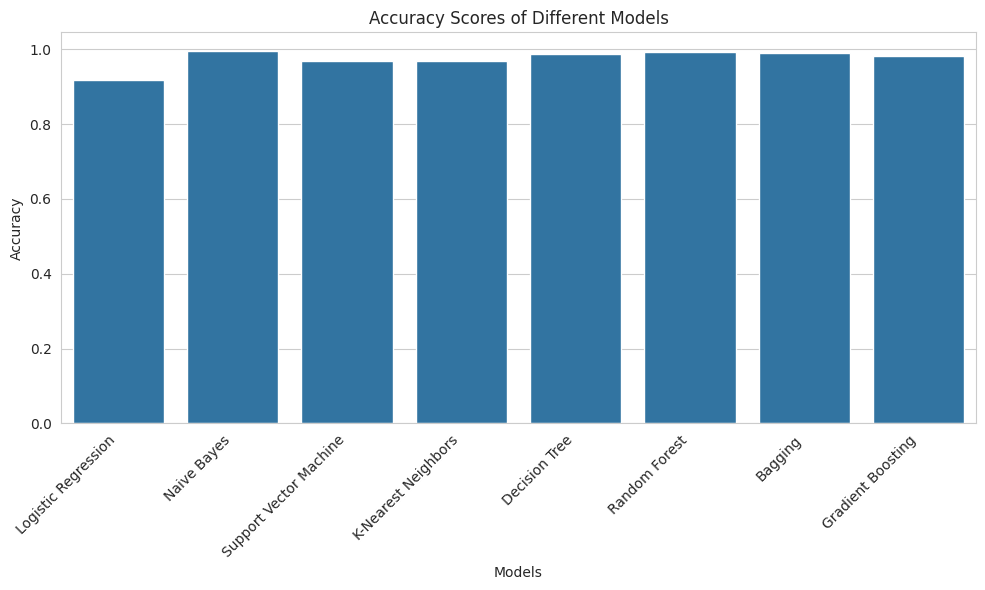

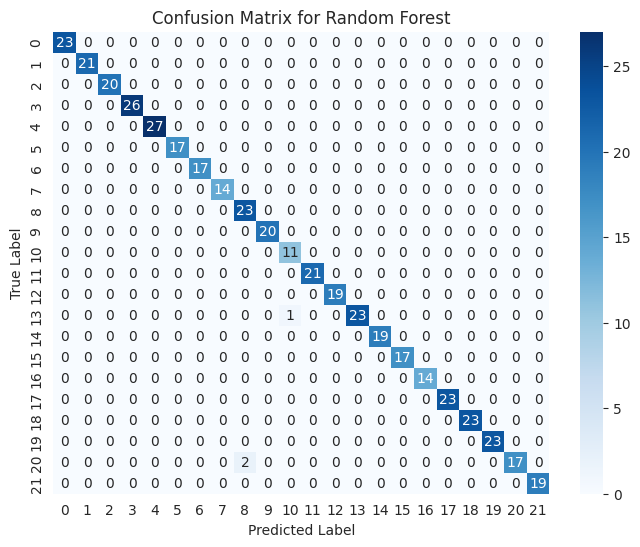

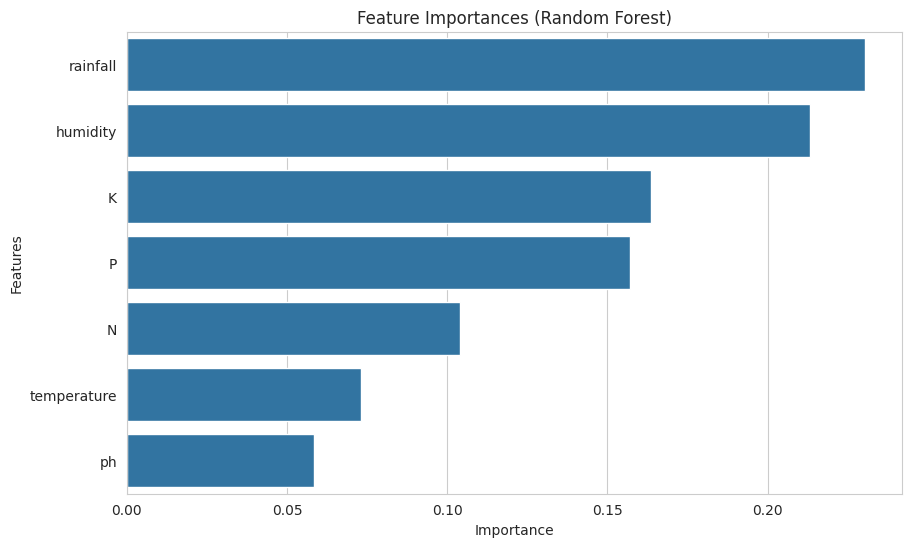

In [ ]:
# prompt: for above code graphical representation

# Assuming you have a dictionary 'models' with model names as keys and trained models as values
# Also assuming you have a list of accuracy scores 'accuracy_scores'

model_names = list(models.keys())
accuracy_scores = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

# Bar plot of accuracy scores for different models
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Confusion matrix for a specific model (e.g., Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# You can also create plots for individual model predictions, feature importances, etc.

# For example, to plot feature importances for a tree-based model:
if isinstance(models['Random Forest'], (DecisionTreeClassifier, RandomForestClassifier)):
  importances = models['Random Forest'].feature_importances_
  feature_names = X.columns
  sorted_indices = np.argsort(importances)[::-1]

  plt.figure(figsize=(10, 6))
  sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices])
  plt.title('Feature Importances (Random Forest)')
  plt.xlabel('Importance')
  plt.ylabel('Features')
  plt.show()


In [ ]:
# finally selected randomforest model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [ ]:
# or gausianjb
gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to optimize performance
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Grid Search with cross-validation
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Logistic Regression: {grid_logreg.best_params_}")
print(f"Best cross-validation accuracy for Logistic Regression: {grid_logreg.best_score_}")

# Predict using the best model
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test)

# Evaluate accuracy on test set
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.9795454545454547
Logistic Regression Test Accuracy: 0.9705


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Define a parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid Search with cross-validation
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for KNN: {grid_knn.best_params_}")
print(f"Best cross-validation accuracy for KNN: {grid_knn.best_score_}")

# Predict using the best model
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

# Evaluate accuracy on test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Test Accuracy: {accuracy_knn:.4f}")


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.9869318181818182
KNN Test Accuracy: 0.9750


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate Logistic Regression with cross-validation
cv_scores_logreg = cross_val_score(grid_logreg.best_estimator_, X_train, y_train, cv=5)
print(f"Logistic Regression CV Mean Accuracy: {cv_scores_logreg.mean():.4f}")

# Evaluate KNN with cross-validation
cv_scores_knn = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=5)
print(f"KNN CV Mean Accuracy: {cv_scores_knn.mean():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Mean Accuracy: 0.9795
KNN CV Mean Accuracy: 0.9869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c